## ***퍼스널 컬러 진단 모델*** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##초기 라이브러리 로딩
import numpy as np
import os,re,glob,cv2
import PIL
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from tensorflow import keras
import argparse
from sklearn.cluster import KMeans
import cv2 as cv
import colour
import utils
import math
import timeit
import warnings
import colorsys
from collections import OrderedDict
import dlib
import imutils
import matplotlib
import matplotlib.image as mpimg

### Data Load

In [ ]:
# 사진 불러오기
image_datas = glob.glob('/content/drive/MyDrive/CV/gooddataset/*/*.png')
categories = ["spring","summer","autumn","winter"] 
dic = {"spring":0,"summer":1,"autumn":2,"winter":3}

X = []
Y = []

# 라벨링
for imagename in image_datas:
  image = Image.open(imagename)
  image = image.resize((128,128))
  image = np.array(image)
  X.append(image)
  label = imagename.split('/')[7].split('.')[0]
  label = dic[label]
  print(label)
  Y.append(label)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
# 데이터 셋 나누기
# train : valid = 0.8 : 0.2
train_images, valid_images, train_labels, valid_labels = train_test_split(X,Y,test_size=0.2, shuffle=True, random_state=44)

train_labels = train_labels[...,tf.newaxis]
valid_labels = valid_labels[...,tf.newaxis]

train_images.shape, train_labels.shape, valid_images.shape, valid_labels.shape

((5161, 128, 128, 3), (5161, 1), (1291, 128, 128, 3), (1291, 1))

In [ ]:
# train data class별 image 수
unique, counts = np.unique(np.reshape(train_labels,(5161,)),axis=-1, return_counts=True)
dict(zip(unique,counts))

{0: 824, 1: 1614, 2: 1201, 3: 1522}

In [ ]:
# valid data class별 image 수
unique, counts = np.unique(np.reshape(valid_labels,(1291,)),axis=-1, return_counts=True)
dict(zip(unique,counts))

{0: 189, 1: 408, 2: 303, 3: 391}

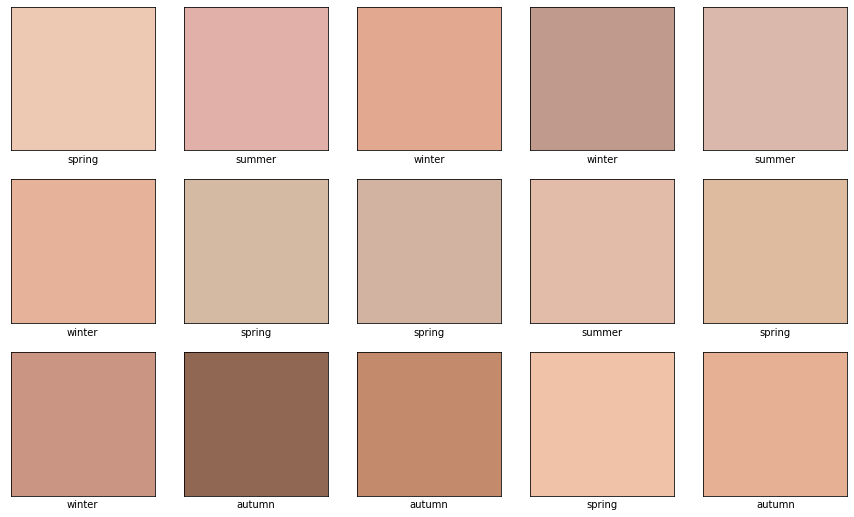

In [ ]:
# data 확인
plt.figure(figsize=(15,9))
for i in range(15):
  img_idx = np.random.randint(0,5161)
  plt.subplot(3,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[img_idx])
  plt.xlabel(categories[train_labels[img_idx][0]])

In [ ]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
valid_images = valid_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = keras.utils.to_categorical(train_labels)
valid_labels = keras.utils.to_categorical(valid_labels)

In [ ]:
print(train_images.shape, train_labels.shape)
print(valid_images.shape, valid_labels.shape)

(5161, 128, 128, 3) (5161, 4)
(1291, 128, 128, 3) (1291, 4)


### Creating a CNN

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

In [ ]:
from keras import optimizers
adam = keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=adam)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)      

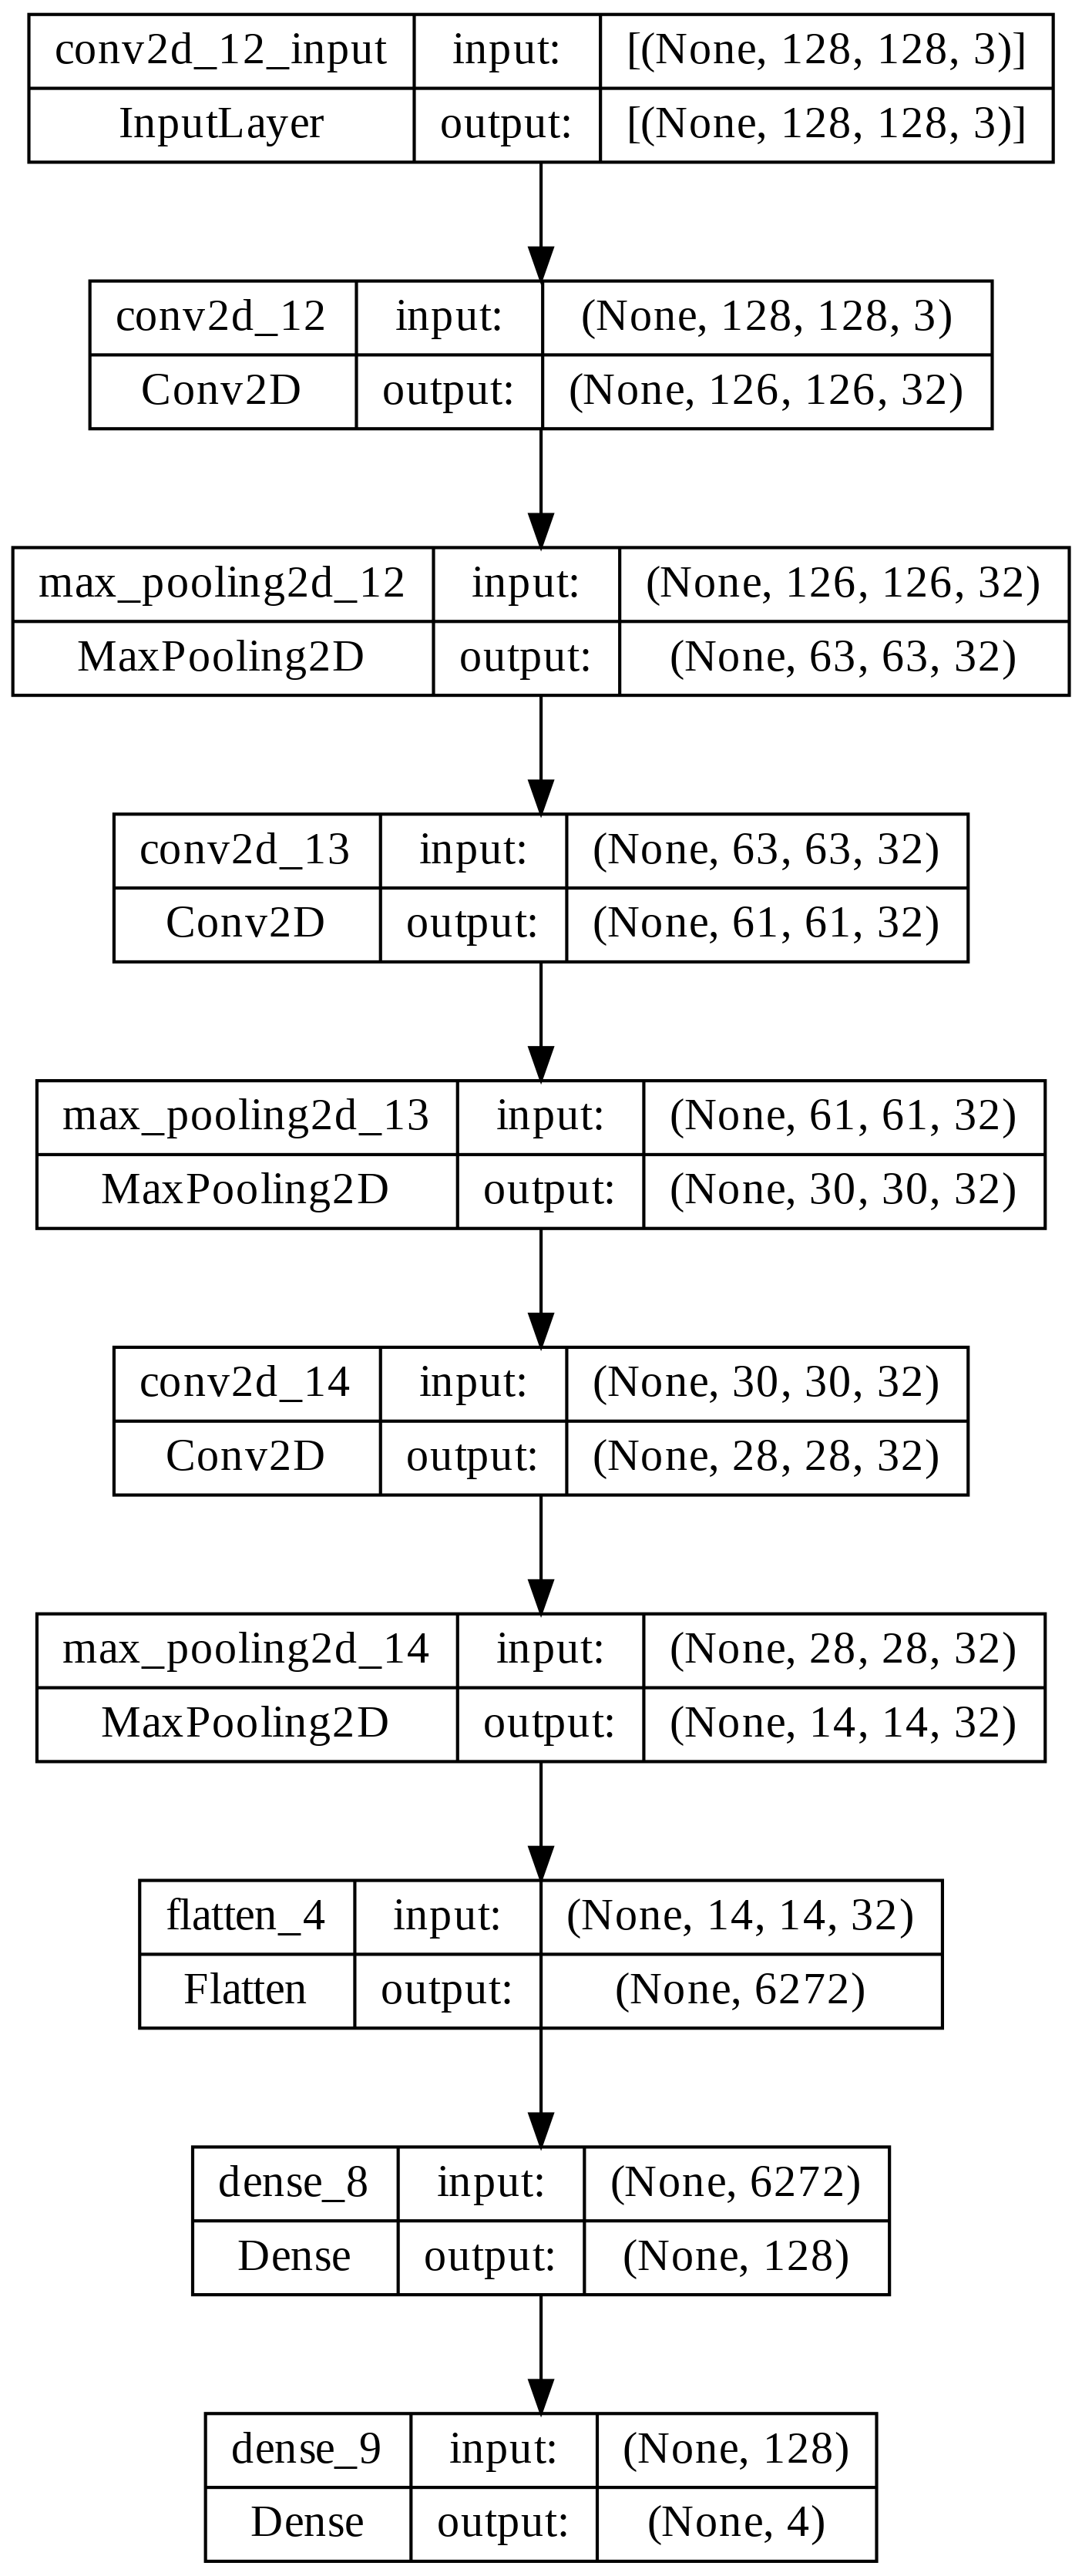

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=300)

### Train model

In [ ]:
history = model.fit(train_images, train_labels, 
                    batch_size=32, epochs=25,
                    validation_data = (valid_images, valid_labels))

Epoch 1/25
162/162 [==============================] - 107s 657ms/step - loss: 1.2670 - accuracy: 0.4164 - val_loss: 1.0848 - val_accuracy: 0.5167
Epoch 2/25
162/162 [==============================] - 112s 693ms/step - loss: 0.9569 - accuracy: 0.5970 - val_loss: 0.8200 - val_accuracy: 0.6623
Epoch 3/25
162/162 [==============================] - 121s 746ms/step - loss: 0.6978 - accuracy: 0.7365 - val_loss: 0.6543 - val_accuracy: 0.7653
Epoch 4/25
162/162 [==============================] - 110s 680ms/step - loss: 0.5585 - accuracy: 0.7809 - val_loss: 0.4712 - val_accuracy: 0.8304
Epoch 5/25
162/162 [==============================] - 113s 701ms/step - loss: 0.5120 - accuracy: 0.7954 - val_loss: 0.4108 - val_accuracy: 0.8590
Epoch 6/25
162/162 [==============================] - 131s 812ms/step - loss: 0.4118 - accuracy: 0.8396 - val_loss: 0.3701 - val_accuracy: 0.8613
Epoch 7/25
162/162 [==============================] - 124s 768ms/step - loss: 0.3547 - accuracy: 0.8679 - val_loss: 0.3658 -

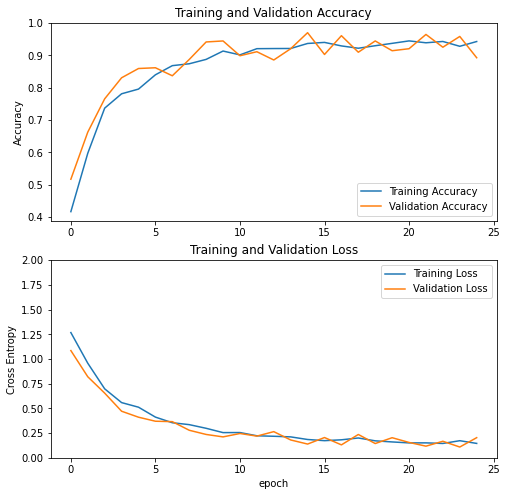

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# 모델 저장하기
model.save('personal_color.h5')

### Predict model

#### test data 불러오기

In [ ]:
# 사진 불러오기
image_datas = glob.glob('/content/drive/MyDrive/CV/testdataset/*/*.png')
categories = ["spring","summer","autumn","winter"] 
dic = {"spring":0,"summer":1,"autumn":2,"winter":3}

X = []
Y = []

# 라벨링
for imagename in image_datas:
  image = Image.open(imagename)
  image = image.resize((128,128))
  image = np.array(image)
  X.append(image)
  label = imagename.split('/')[6]
  label = dic[label]
  print(label)
  Y.append(label)

3
3
3
3
3
1
1
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2


In [ ]:
X = np.array(X)
Y = np.array(Y)

test_images, test2_images, test_labels, test2_labels= train_test_split(X,Y, test_size=0.1, shuffle=True, random_state=44)

test_labels = test_labels[...,tf.newaxis]
test2_labels = test2_labels[...,tf.newaxis]

In [ ]:
# test data class별 image 수
unique, counts = np.unique(np.reshape(test_labels,(19,)),axis=-1, return_counts=True)
dict(zip(unique,counts))

{0: 7, 1: 1, 2: 7, 3: 4}

In [ ]:
# pixel값을 0~1사이 범위로 조정
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
test_labels = keras.utils.to_categorical(test_labels)

#### test data로 예측하기

In [ ]:
# 모델 불러오기
from keras.models import load_model
model = model.load_model('personal_color.h5')

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if (predicted_label == true_label).all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

In [ ]:
# 4개 그래프에 대한 예측 그래프로 표현
def plot_image(i, predictions_array, true_label, img): # 그래프로 표현하는 함수
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if (predicted_label == true_label).all():
     color = 'blue'
  else:
     color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(32)

In [ ]:
def plot_value_array(i, predictions_array, true_label): #
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(4), categories, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

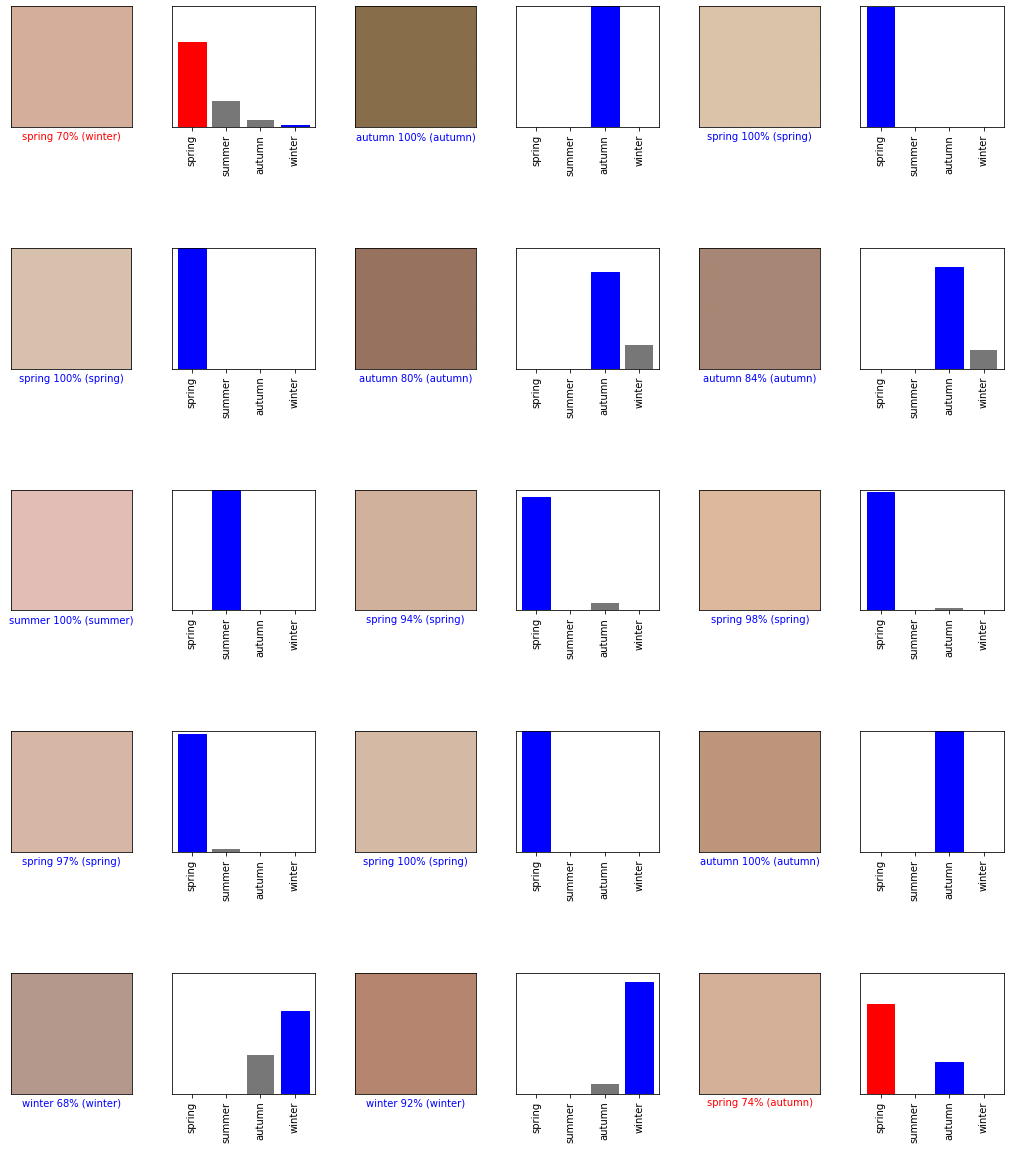

In [ ]:
# plt.subplot - 한개의 화면에 여러 그래프 나눠 그리기
# 파랑색 - 올바른 예측
# 빨강색 - 잘못된 예측
for images, labels in test_dataset:
  predictions = model(images, training=False)
  num_rows = 5
  num_cols = 3
  num_images = num_rows*num_cols 
  labels = tf.argmax(labels, axis=-1)
  plt.figure(figsize=(3*2*num_cols, 4*num_rows))
  plt.subplots_adjust(hspace=1.0)
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions.numpy(), labels.numpy())
  break

#### 사진 업로드해서 예측하기

In [ ]:
# 파이썬 파일에 필요한 라이브러리

#!pip install colour
#!pip install utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 파이썬 파일에 필요한 파일

# shape_predictor_68_face_landmarks.dat 업로드
# 예측할 사진 파일 업로드

##### 홍성은 교수님

In [ ]:
# 퍼스널 컬러 분류 파이썬 파일 업로드
from google.colab import files
src = list(files.upload().values())[0]
open('/content/skin1.py','wb').write(src)

Saving skindetect.py to skindetect (1).py


12693

In [ ]:
# 파이썬 파일 실행 -> hsv 기준 분류 결과 확인
import skin1

24.87 18.75
31.533999999999 30.1
1
14.31 66.42
winter


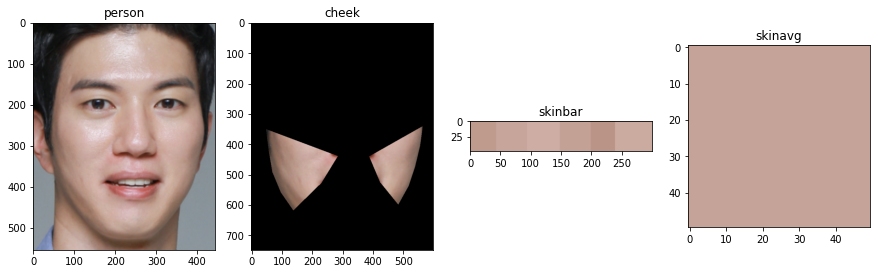

In [ ]:
# 데이터 전처리 과정
person = mpimg.imread('person.png')
cheek = mpimg.imread('cheek.png')
bar = mpimg.imread('bar.png')
skin = mpimg.imread('skin.png')

plt.figure(figsize=(15, 10))
plt.subplot(1,4,1)
plt.title('person')
plt.imshow(person)
plt.subplot(1,4,2)
plt.title('cheek')
plt.imshow(cheek)
plt.subplot(1,4,3)
plt.title('skinbar')
plt.imshow(bar)
plt.subplot(1,4,4)
plt.title('skinavg')
plt.imshow(skin)

In [ ]:
# 모델로 예측하기
import numpy as np
from google.colab import files
from keras.preprocessing import image

path='/content/skin.png'
img=keras.utils.load_img(path, target_size=(128, 128))
x=keras.utils.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=32)
for i in range(0,4,1) :
  print(categories[i], "=", classes[0][i])
print("예측한 결과 = " , categories[classes.argmax()])

1/1 [==============================] - 0s 186ms/step
spring = 0.0
summer = 1.0
autumn = 0.0
winter = 0.0
예측한 결과 =  summer


##### 이채은 교수님

In [ ]:
# 퍼스널 컬러 분류 파이썬 파일 업로드
from google.colab import files
src = list(files.upload().values())[0]
open('/content/skin2.py','wb').write(src)

Saving skindetect_이채은교수님.py to skindetect_이채은교수님.py


12690

In [ ]:
# 파이썬 파일 실행 -> hsv 기준 분류 결과 확인
import skin2

24.87 18.75
31.533999999999 30.1
1
13.71 74.98
summer


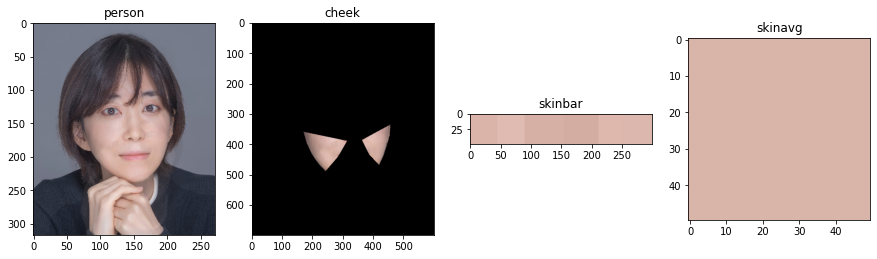

In [ ]:
# 데이터 전처리 과정
person = mpimg.imread('rce.png')
cheek = mpimg.imread('cheek.png')
bar = mpimg.imread('bar.png')
skin = mpimg.imread('skin.png')

plt.figure(figsize=(15, 10))
plt.subplot(1,4,1)
plt.title('person')
plt.imshow(person)
plt.subplot(1,4,2)
plt.title('cheek')
plt.imshow(cheek)
plt.subplot(1,4,3)
plt.title('skinbar')
plt.imshow(bar)
plt.subplot(1,4,4)
plt.title('skinavg')
plt.imshow(skin)

In [ ]:
# 모델로 예측하기
import numpy as np
from google.colab import files
from keras.preprocessing import image

path='/content/skin.png'
img=keras.utils.load_img(path, target_size=(128, 128))
x=keras.utils.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=32)
for i in range(0,4,1) :
  print(categories[i], "=", classes[0][i])
print("예측한 결과 = " , categories[classes.argmax()])

1/1 [==============================] - 0s 33ms/step
spring = 0.0
summer = 1.0
autumn = 0.0
winter = 0.0
예측한 결과 =  summer
